# Parts 1 and 2

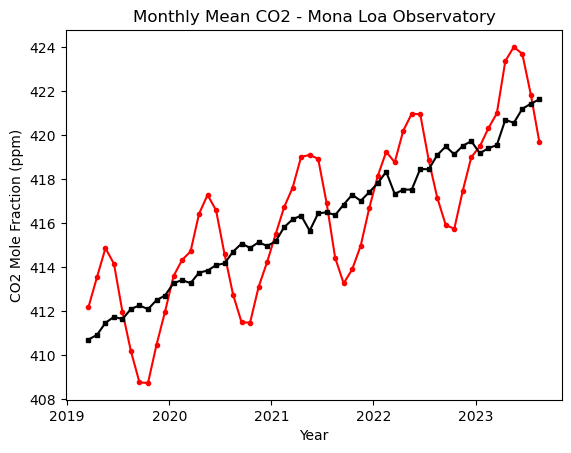

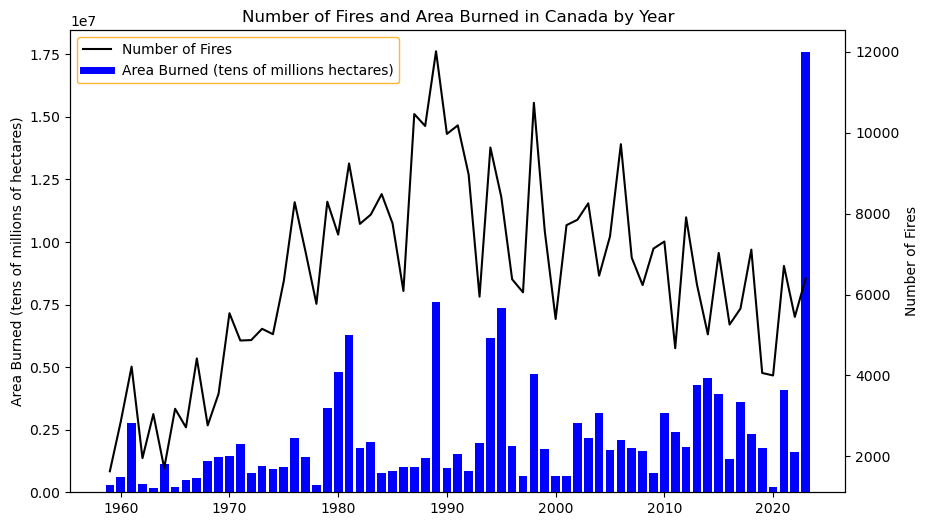

In [1]:
# Chat GPT: How to plot loaded csv file in pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

co2_data = pd.read_csv("Data\co2_mm_mlo.csv", comment = '#')

# Chat GPT: How to plot last data entries
plt.plot(co2_data["decimal date"].tail(54), co2_data["average"].tail(54), color = 'r', marker = 'o', markersize = 3)

plt.plot(co2_data["decimal date"].tail(54), co2_data["deseasonalized"].tail(54), color = "black", marker = "s", markersize = 3)

plt.xlabel("Year")
plt.ylabel("CO2 Mole Fraction (ppm)")
plt.title("Monthly Mean CO2 - Mona Loa Observatory")
plt.show()

##############################################################################################################################################
# Number of fires burned and area burned in Canada by year
nfdb = "Data/NFDB_point_stats.xlsx"
data = pd.read_excel(nfdb, sheet_name = 0, header = 4, skipfooter = 1)

data2023 = [2023, 6400, 17577396, np.NaN, np.NaN, np.NaN]
data2022 = [2022, 5449, 1610216, np.NaN, np.NaN, np.NaN]

wildfire_data = data.shift(periods = 2)

wildfire_data.loc[0] = data2023
wildfire_data.loc[1] = data2022

# Chat GPT: How to have 2 y-axes on the same plot
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.bar(wildfire_data["YEAR"], wildfire_data["TOTAL_HA"], color = 'blue', label = "Area burned, CNFDB")
ax1.set_ylabel("Area Burned (tens of millions of hectares)")
ax2 = ax1.twinx()
ax2.plot(wildfire_data["YEAR"], wildfire_data["FIRES"], color = 'black', label = "Number of fires, CNFDB")
ax2.set_xlabel("Years", color = 'black')
ax2.set_ylabel('Number of Fires')

# Chat GPT: Create legend from scratch
legend1 = plt.Line2D([], [], color = 'k', label = 'Number of Fires')
legend2 = plt.Line2D([], [], color = 'b', linewidth = 5, label = 'Area Burned (tens of millions hectares)')
ax1.legend(handles = [legend1, legend2], loc = 'upper left', frameon = True, edgecolor = 'orange')

plt.title("Number of Fires and Area Burned in Canada by Year")
plt.show()

# Part 3

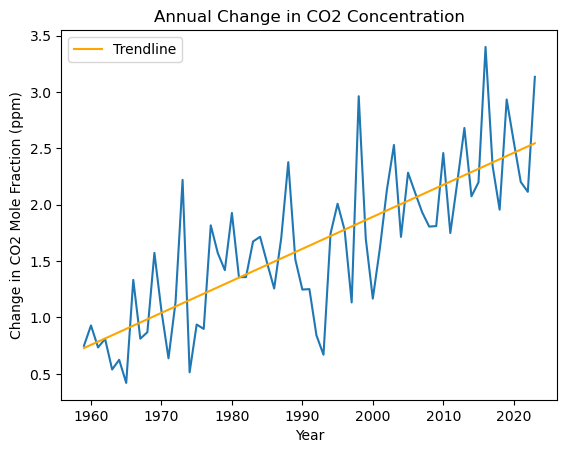

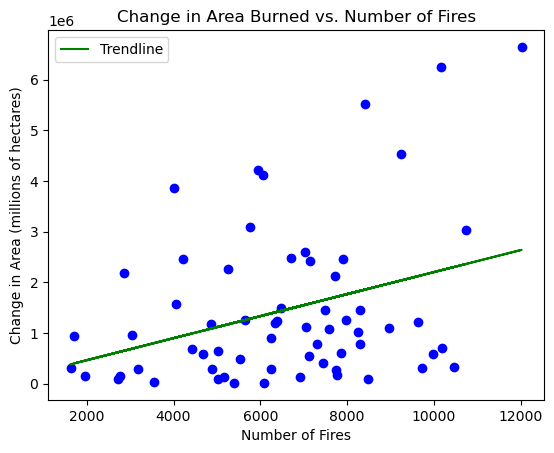

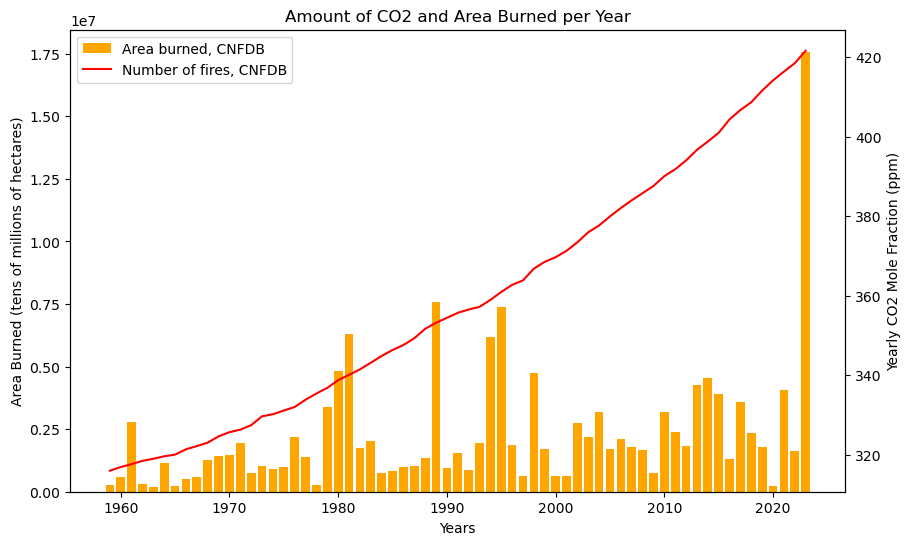

In [2]:
# CO2 increase vs. area burned
yearly_co2 = co2_data.groupby('year')['average'].mean()
co2_difference = []
iterator = 1959
for values in yearly_co2:
    if iterator == 2024:
        continue
    co2_difference.append(yearly_co2[iterator] - yearly_co2[iterator-1])
    iterator += 1

years = list(range(1959,2024))

# Chat GPT: How to create a trendline using Matplotlib
coefficients = np.polyfit(years, co2_difference, 1)
slope, intercept = coefficients
predicted_values = np.polyval(coefficients, years)

plt.plot(years, co2_difference)
plt.plot(years, predicted_values, label = 'Trendline', color = 'orange')
plt.legend()
plt.title("Annual Change in CO2 Concentration")
plt.ylabel("Change in CO2 Mole Fraction (ppm)")
plt.xlabel("Year")
plt.show()

###########################################################################################################################################
# Change in area burned vs. number of fires
area_diff = []
area_data = wildfire_data["TOTAL_HA"]
iterator = 2
for values in area_data:
    if iterator == 65:
        continue
    area_diff.append(abs(area_data[iterator] - area_data[iterator-1]))
    iterator += 1

fire_data = wildfire_data["FIRES"][2:]

coefficients = np.polyfit(fire_data, area_diff, 1)
slope, intercept = coefficients
predicted_values2 = np.polyval(coefficients, fire_data)

plt.scatter(fire_data, area_diff, color = 'blue')
plt.plot(fire_data, predicted_values2, label = 'Trendline', color = 'green')
plt.title("Change in Area Burned vs. Number of Fires")
plt.xlabel("Number of Fires")
plt.ylabel("Change in Area (millions of hectares)")
plt.legend()
plt.show()

###########################################################################################################################################
# Fires > 200 ha and amount of CO2 per year
recent_co2 = yearly_co2[1:]
flipped_co2 = recent_co2[::-1]
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.bar(wildfire_data["YEAR"], wildfire_data["TOTAL_HA"], color = 'orange', label = "Area burned, CNFDB")
ax1.set_ylabel("Area Burned (tens of millions of hectares)")
ax2 = ax1.twinx()
ax2.plot(wildfire_data["YEAR"], flipped_co2, color = 'red', label = "Number of fires, CNFDB")

# Chat GPT: Create legend for dual y-axis chart
lines_0, labels_0 = ax1.get_legend_handles_labels()
lines_1, labels_1 = ax2.get_legend_handles_labels()
ax1.legend(lines_0 + lines_1, labels_0 + labels_1, loc='upper left')

ax1.set_xlabel("Years")
ax2.set_ylabel('Yearly CO2 Mole Fraction (ppm)')
plt.title("Amount of CO2 and Area Burned per Year")
plt.show()

# Part 4

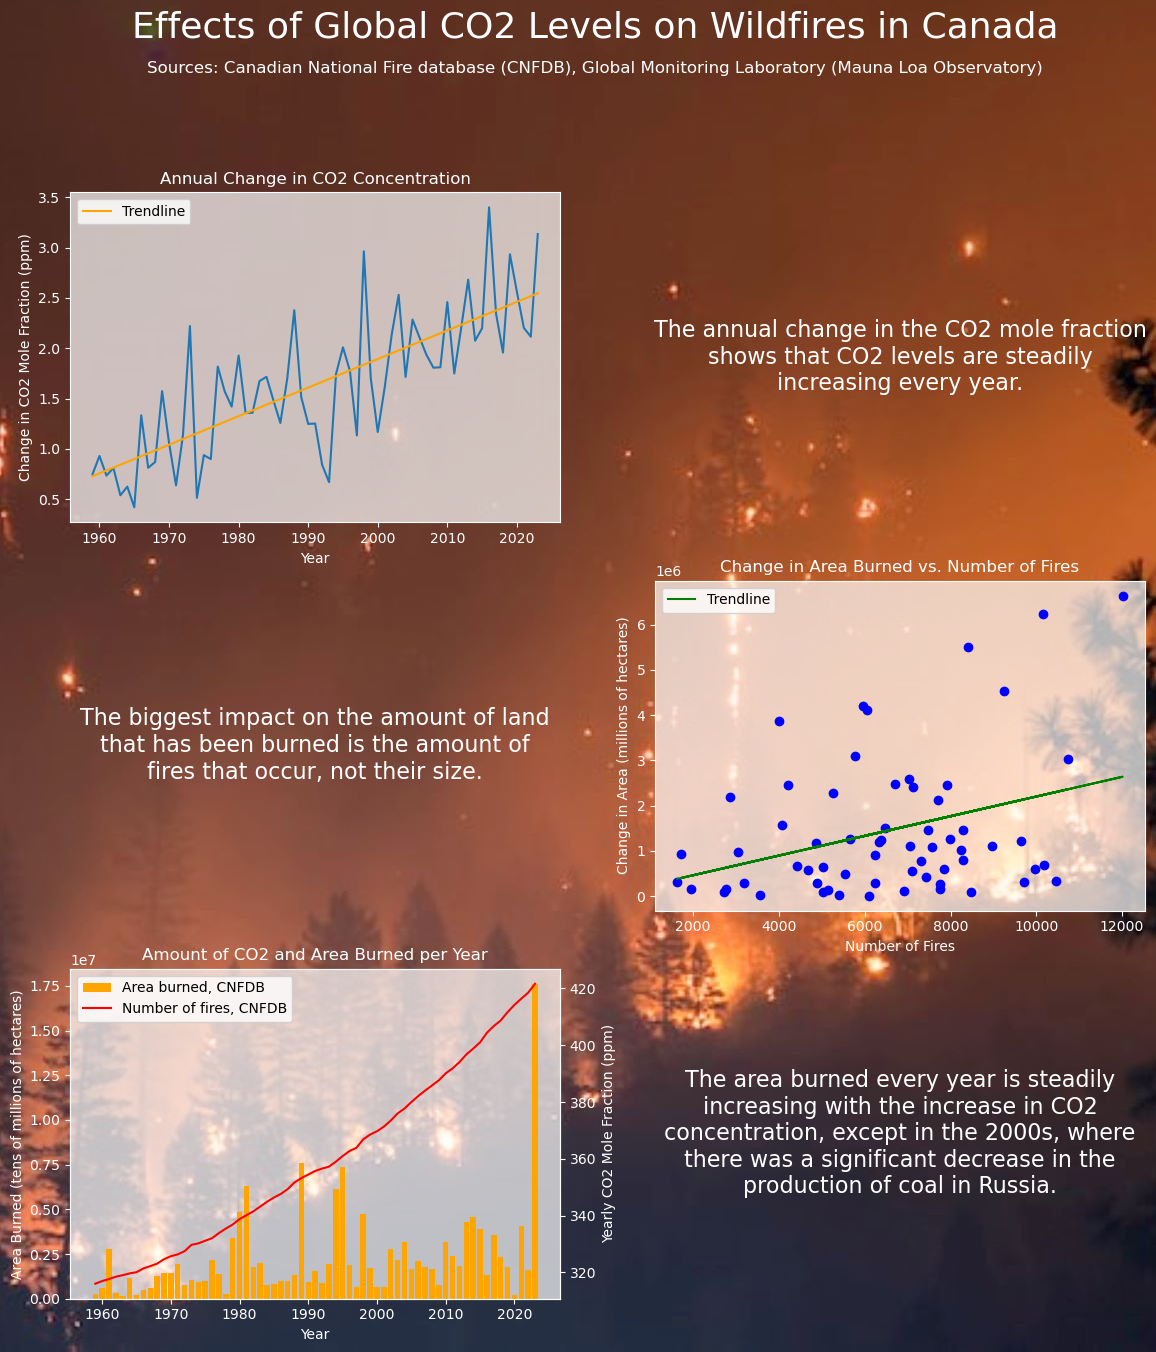

In [6]:
# Chat GPT: Set graphs to white
plt.rcParams.update({
    'axes.labelcolor': 'white',     # Axis label color
    'xtick.color': 'white',        # X-axis tick color
    'ytick.color': 'white',        # Y-axis tick color
    'axes.edgecolor': 'white',     # Axis edge color
})

# Chat GPT: Can you give me an example of coding an infographic with three charts in python?

# Create a figure with three rows and two columns of subplots
bg_image = plt.imread('Images/photo-1511027643875-5cbb0439c8f1.jpg')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.figimage(bg_image, zorder = -1)
for ax in np.ravel(axes):
    ax.patch.set_alpha(0.7)

# First chart:
axes[0, 0].plot(years, co2_difference)
axes[0, 0].plot(years, predicted_values, label = 'Trendline', color = 'orange')
axes[0, 0].set_title('Annual Change in CO2 Concentration', color = 'white')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Change in CO2 Mole Fraction (ppm)')
axes[0, 0].legend()

# Second chart:
axes[1, 1].scatter(fire_data, area_diff, color = 'blue')
axes[1, 1].plot(fire_data, predicted_values2, label = 'Trendline', color = 'green')
axes[1, 1].set_title('Change in Area Burned vs. Number of Fires', color = 'white')
axes[1, 1].set_xlabel('Number of Fires')
axes[1, 1].set_ylabel('Change in Area (millions of hectares)')
axes[1, 1].legend()

# Third chart:
ax3_0 = axes[2, 0]
ax3_1 = ax3_0.twinx()   # Create a secondary y-axis
ax3_0.bar(wildfire_data["YEAR"], wildfire_data["TOTAL_HA"], color = 'orange', label = "Area burned, CNFDB")
ax3_1.plot(wildfire_data["YEAR"], flipped_co2, color = 'red', label = "Number of fires, CNFDB")
ax3_0.set_title('Amount of CO2 and Area Burned per Year', color = 'white')
ax3_0.set_xlabel('Year')
ax3_0.set_ylabel('Area Burned (tens of millions of hectares)')
ax3_1.set_ylabel('Yearly CO2 Mole Fraction (ppm)')
lines_0, labels_0 = ax3_0.get_legend_handles_labels()   # Add a legend for the dual y-axis chart
lines_1, labels_1 = ax3_1.get_legend_handles_labels()
ax3_0.legend(lines_0 + lines_1, labels_0 + labels_1, loc='upper left')

# Text for analysing data
co2_text = '''The annual change in the CO2 mole fraction
shows that CO2 levels are steadily
increasing every year.'''
num_fires_text = '''The biggest impact on the amount of land
that has been burned is the amount of
fires that occur, not their size.'''
fire_area_text = '''The area burned every year is steadily
increasing with the increase in CO2
concentration, except in the 2000s, where
there was a significant decrease in the
production of coal in Russia.'''

# Hide the empty subplots
axes[0, 1].axis('off')
axes[0, 1].text(0.5, 0.5, co2_text, fontsize=16, ha='center', va='center', color='white')
axes[1, 0].axis('off')
axes[1, 0].text(0.5, 0.5, num_fires_text, fontsize=16, ha='center', va='center', color='white')
axes[2, 1].axis('off')
axes[2, 1].text(0.5, 0.5, fire_area_text, fontsize=16, ha='center', va='center', color='white')

# Add text to the infographic
text_x = 0.5  # X-coordinate for the text
text_y = 1.1  # Y-coordinate for the text
fig.text(text_x, text_y, 'Effects of Global CO2 Levels on Wildfires in Canada', fontsize=26, ha='center', color = 'white')
fig.text(text_x, text_y - 0.03, 'Sources: Canadian National Fire database (CNFDB), Global Monitoring Laboratory (Mauna Loa Observatory)',
         fontsize=12, ha='center', color = 'white')

# Adjust spacing between subplots
plt.tight_layout()

# Save the infographic as an image (optional)
plt.savefig('Images/infographic.png', bbox_inches = 'tight')

# Display the infographic
plt.show()
